In [1]:
try:
  # First download the clinic repository
  import os
  os.chdir('/content')
  !git clone https://github.com/littlebiggeo/csdms-clinic-2020.git

  # Now install environment using tool
  !/bin/bash /content/csdms-clinic-2020/hrt/install_raster_tools.sh
 
except:
  pass

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()

import sys
sys.path.append(os.path.join(workbookDir,"csdms-clinic-2020"))

Cloning into 'csdms-clinic-2020'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 194 (delta 49), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (194/194), 34.86 MiB | 9.34 MiB/s, done.
Resolving deltas: 100% (49/49), done.
(1) Install Whitebox via pip
(2) Install gdal via apt-get
(3) Install rasterio via pip
(4) Install earthpy via pip
(5) Install seaborn via pip
(6) Install pygeotools via pip
(7) Install google drive downloader via pip
(7) Download CSDMS 2020 clinic github repository
(8) Ready!


In [2]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import os, pkg_resources
from pygeotools.lib import iolib, warplib, geolib, timelib, malib
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
import rasterio as rio
import imageio
from rasterio.plot import plotting_extent

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1mT2hCI7T3zVGEe7jVDz5xvoS83zoeVVj',
                                    dest_path='./data/dem1_sl.tif',
                                    unzip=False)

In [14]:
data_dir = '/content/data/'
print(os.listdir(data_dir))

['dem1_sl.tif', 'dem3_cy_creek.tif', '.ipynb_checkpoints']


In [73]:
import whitebox
wbt = whitebox.WhiteboxTools()
# set whitebox working directory
wbt.set_working_dir(data_dir)
wbt.verbose = False

# call whiteboxtool
wbt.feature_preserving_smoothing("dem1_sl.tif", "smoothed.tif", filter=3)
wbt.breach_depressions("smoothed.tif", "breached.tif")
wbt.d_inf_flow_accumulation("breached.tif", "flow_accum.tif")
wbt.d8_flow_accumulation("breached.tif", "flow_accum_d8.tif")

0

In [16]:
!pip install tifffile

     |████████████████████████████████| 133kB 2.7MB/s 
     |████████████████████████████████| 18.1MB 36.8MB/s 


In [0]:
import matplotlib.pyplot as plt
import imageio
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


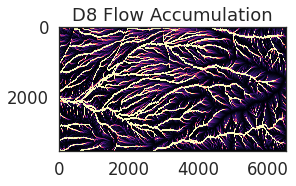

In [87]:
fig=plt.figure(figsize=(24,16))
raster = imageio.imread(os.path.join(data_dir, 'flow_accum.tif'))
raster2 = imageio.imread(os.path.join(data_dir, 'flow_accum_d8.tif'))

ax1 = fig.add_subplot(2, 2, 1)
plt.imshow(raster, cmap='magma', vmin=0, vmax=1000)
plt.show()



In [0]:
original = imageio.imread(os.path.join(data_dir, 'dem1_sl.tif'))
smoothed = imageio.imread(os.path.join(data_dir, 'smoothed.tif'))
breached = imageio.imread(os.path.join(data_dir, 'breached.tif'))
flow_accum = imageio.imread(os.path.join(data_dir, 'flow_accum.tif'))
flow_accum_d8 = imageio.imread(os.path.join(data_dir, 'flow_accum_d8.tif'))

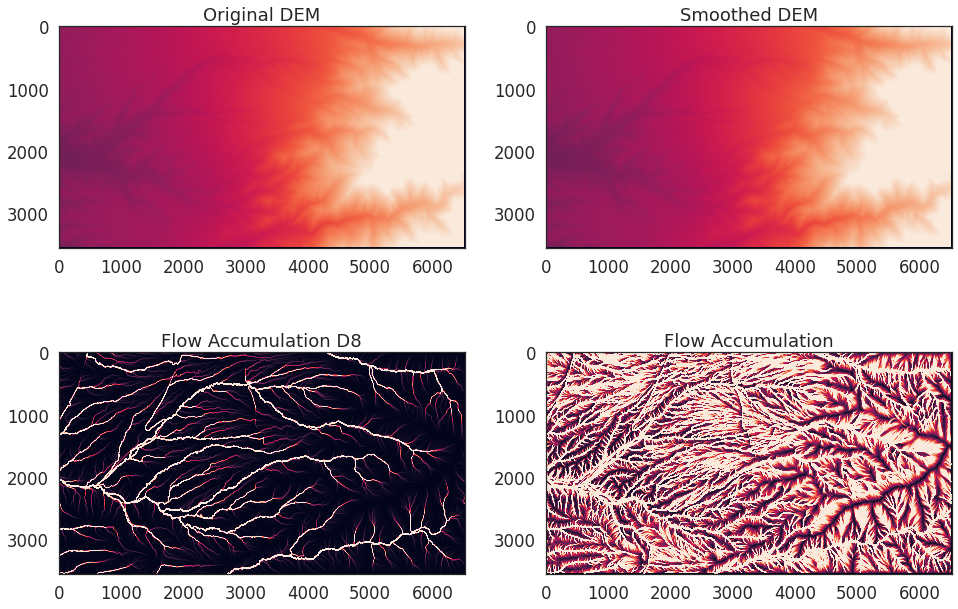

In [95]:
fig=plt.figure(figsize=(16,11))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('Original DEM')
plt.imshow(original, vmin=2000, vmax=3000)

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('Smoothed DEM')
plt.imshow(smoothed, vmin=2000, vmax=3000)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Flow Accumulation D8')
plt.imshow(flow_accum_d8, vmin=0, vmax=5000)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Flow Accumulation')
plt.imshow(flow_accum, vmin=0, vmax=100)

plt.show()

In [173]:
wbt.hillshade("dem1_sl.tif", "dem1_sl_315_30.tif", 315, 30)

0

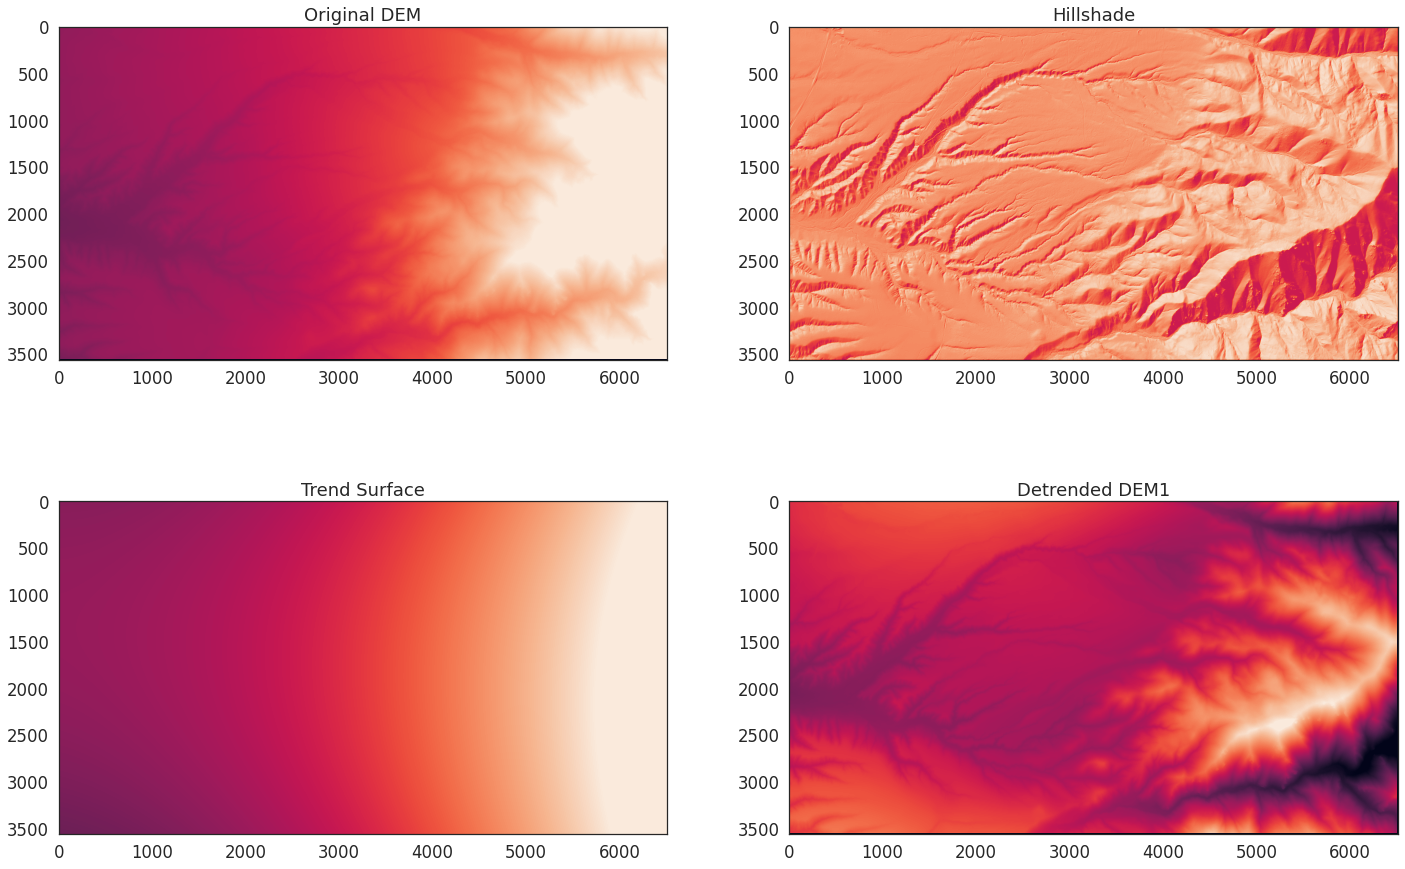

In [177]:
hillshade = imageio.imread(os.path.join(data_dir, 'dem1_sl_315_30.tif'))

fig=plt.figure(figsize=(24,16))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('Original DEM')
plt.imshow(original, vmin=2000, vmax=3000)

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('Hillshade')
plt.imshow(hillshade)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Trend Surface')
plt.imshow(trend_surface, vmin=2000, vmax=3000)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Detrended DEM1')
plt.imshow(detrended, vmin=-200, vmax=200)

plt.show()

In [155]:
wbt.trend_surface("dem1_sl.tif", "dem1_sl_trend_2.tif", order=2)

tcmalloc: large alloc 1113260032 bytes == 0x55646b44e000 @  0x7fc7a8f8a001 0x55643d870a77 0x55643d214512 0x55643dc467d9 0x55643dc43daf 0x55643d933183 0x55643dd1a803 0x55643dd2335a 0x55643dd1b250 0x55643dc478f2 0x7fc7a8342b97 0x55643d07cd6a


0

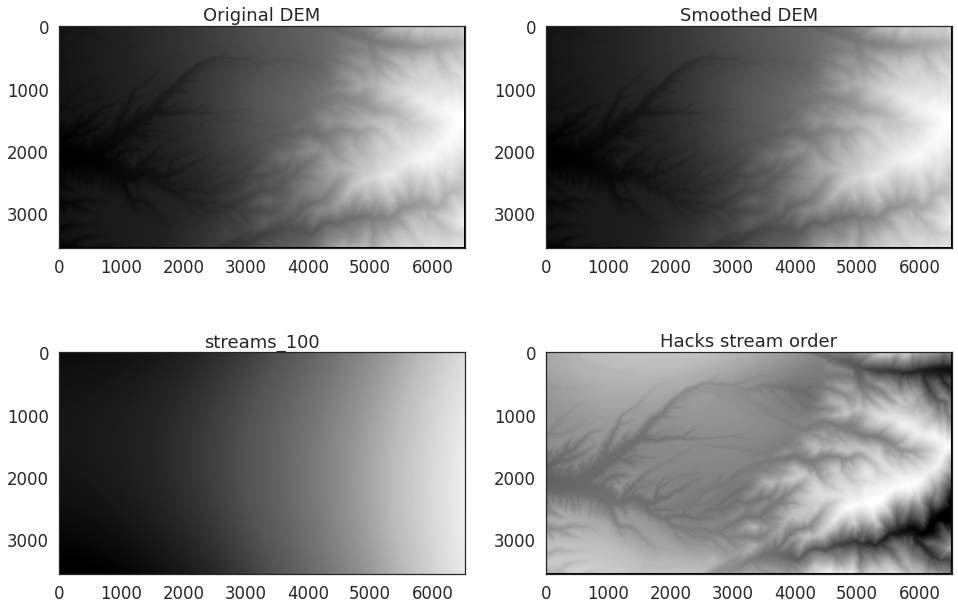

In [172]:
trend_surface = imageio.imread(os.path.join(data_dir, 'dem1_sl_trend_2.tif'))
wbt.subtract("dem1_sl.tif", "dem1_sl_trend_2.tif", "detrended_dem1.tif")
detrended = imageio.imread(os.path.join(data_dir, 'detrended_dem1.tif'))


fig=plt.figure(figsize=(16,11))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('Original DEM')
plt.imshow(original, vmin=2300, vmax=3300, cmap='Greys_r')

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('Smoothed DEM')
plt.imshow(smoothed, vmin=2300, vmax=3300, cmap='Greys_r')

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('streams_100')
plt.imshow(trend_surface, vmin=2300, vmax=3300, cmap='Greys_r')

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Hacks stream order')
plt.imshow(detrended, vmin=-200, vmax=200, cmap='Greys_r')

plt.show()

In [178]:
wbt.slope_vs_elevation_plot("dem1_sl.tif", "dem1_slope_elev.html")

0

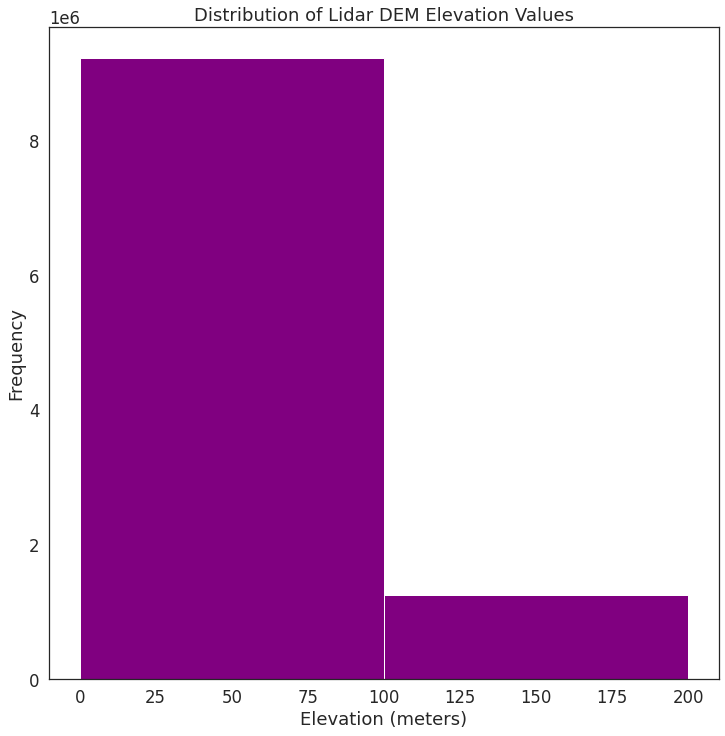

In [166]:
import earthpy as et
import earthpy.plot as ep

ep.hist(detrended,
        bins=[0, 100, 200],
        colors=['purple'],
        title="Distribution of Lidar DEM Elevation Values",
        xlabel='Elevation (meters)',
        ylabel='Frequency')
plt.show()

In [0]:
lidar_dem = rio.open('/content/data/dem1_sl.tif')
flow_acc = rio.open('/content/data/flow_accum.tif')

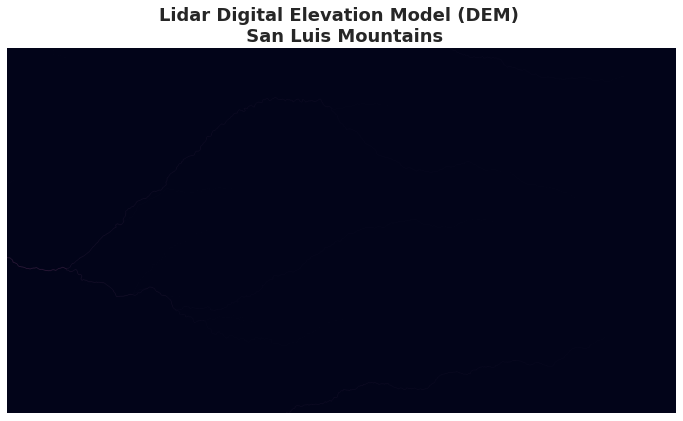

In [72]:
from rasterio.plot import show
from rasterio.mask import mask

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

fig, ax = plt.subplots(figsize = (12,8))

show(flow_acc, 
     title="Lidar Digital Elevation Model (DEM) \n San Luis Mountains", 
     ax=ax)

ax.set_axis_off()

In [53]:
ep.hist(original.mask,
        bins=100, 
        colors=['purple'],
        title="Distribution of Lidar DEM Elevation Values",
        xlabel='Elevation (meters)',
        ylabel='Frequency')
plt.show()

AttributeError: ignored

In [0]:
# Define a spatial extent that is "smaller"
# minx, miny, maxx, maxy, ccw=True
zoomed_extent = [446755, 4053478, 448901, 4055304]

ValueError: ignored